<a href="https://colab.research.google.com/github/MohammadGhodsi/welltest_analysis_project/blob/main/welltest_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import tensorflow as tf
import numpy as np 
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/University_project/primary_dataset.csv')

In [ ]:
df.head(3)

,Dt(hr),Pwf(psi),Pi(psi),DP(psi),Dp',Qo(bbl/d),Bo(bbl/STB),viscosity oil(cp),porosity,Ct(psi^-1),Co(bbl/psi),h(ft),rw(ft),re(ft),S,k(md),Cs(RB/psi),Doi
0,0.01,3957.78,4000.0,42.22,3.6,3170.0,1.26,0.74,0.25,0.000004,0.01,137.0,0.35,100.0,-2.3,16.05,0.01,NaN
1,0.01,3957.78,4000.0,42.22,3.6,3170.0,1.26,0.74,0.25,0.000004,0.01,137.0,0.35,100.0,-2.3,16.05,0.01,NaN
2,0.01,3957.78,4000.0,42.22,3.6,3170.0,1.26,0.74,0.25,0.000004,0.01,137.0,0.35,100.0,-2.3,16.05,0.01,NaN


In [ ]:
X = df.iloc[:,0:13]
X

,Dt(hr),Pwf(psi),Pi(psi),DP(psi),Dp',Qo(bbl/d),Bo(bbl/STB),viscosity oil(cp),porosity,Ct(psi^-1),Co(bbl/psi),h(ft),rw(ft)
0,0.01,3957.78,4000.0,42.22,3.60,3170.0,1.26,0.74,0.25,0.000004,0.01,137.0,0.35
1,0.01,3957.78,4000.0,42.22,3.60,3170.0,1.26,0.74,0.25,0.000004,0.01,137.0,0.35
2,0.01,3957.78,4000.0,42.22,3.60,3170.0,1.26,0.74,0.25,0.000004,0.01,137.0,0.35
3,0.01,3957.78,4000.0,42.22,3.60,3170.0,1.26,0.74,0.25,0.000004,0.01,137.0,0.35
4,0.01,3957.78,4000.0,42.22,3.60,3170.0,1.26,0.74,0.25,0.000004,0.01,137.0,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5073,10265.02,3267.05,4000.0,732.95,0.00,90.5,1.00,1.00,0.05,0.000010,0.50,10.0,0.38
5074,10816.58,3267.05,4000.0,732.95,0.00,90.5,1.00,1.00,0.05,0.000010,0.50,10.0,0.38
5075,11397.77,3267.05,4000.0,732.95,0.00,90.5,1.00,1.00,0.05,0.000010,0.50,10.0,0.38
5076,12010.19,3267.05,4000.0,732.95,-0.01,90.5,1.00,1.00,0.05,0.000010,0.50,10.0,0.38


In [ ]:
Y = df.iloc[:,13:17]
Y

,re(ft),S,k(md),Cs(RB/psi)
0,100.0,-2.3,16.05,0.01
1,100.0,-2.3,16.05,0.01
2,100.0,-2.3,16.05,0.01
3,100.0,-2.3,16.05,0.01
4,100.0,-2.3,16.05,0.01
...,...,...,...,...
5073,351.0,0.0,0.01,1000.00
5074,351.0,0.0,0.01,1000.00
5075,351.0,0.0,0.01,1000.00
5076,351.0,0.0,0.01,1000.00


In [ ]:
np.array(Y, dtype=np.float)
np.array(X, dtype=np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


array([[1.000000e-02, 3.957780e+03, 4.000000e+03, ..., 1.000000e-02,
        1.370000e+02, 3.500000e-01],
       [1.000000e-02, 3.957780e+03, 4.000000e+03, ..., 1.000000e-02,
        1.370000e+02, 3.500000e-01],
       [1.000000e-02, 3.957780e+03, 4.000000e+03, ..., 1.000000e-02,
        1.370000e+02, 3.500000e-01],
       ...,
       [1.139777e+04, 3.267050e+03, 4.000000e+03, ..., 5.000000e-01,
        1.000000e+01, 3.800000e-01],
       [1.201019e+04, 3.267050e+03, 4.000000e+03, ..., 5.000000e-01,
        1.000000e+01, 3.800000e-01],
       [1.265523e+04, 3.255680e+03, 4.000000e+03, ..., 5.000000e-01,
        1.000000e+01, 3.800000e-01]])

In [ ]:
from keras.models import Sequential 
from keras.layers import Activation, Dense 
from keras import initializers 
from keras import regularizers 
from keras import constraints 

model = Sequential() 

model.add(Dense(32, input_shape=(13,), kernel_initializer = 'he_uniform', 
   kernel_regularizer = None, kernel_constraint = 'MaxNorm', activation = 'relu')) 
model.add(Dense(16, activation = 'relu')) 
model.add(Dense(4))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X,Y,epochs=150, batch_size=16, validation_split=0.25,shuffle=True)

Epoch 1/150
238/238 [==============================] - 1s 2ms/step - loss: -1143.1844 - accuracy: 0.6082 - val_loss: -23089.7988 - val_accuracy: 0.3008
Epoch 2/150
238/238 [==============================] - 1s 3ms/step - loss: -1143.1852 - accuracy: 0.6082 - val_loss: -23089.7988 - val_accuracy: 0.3008
Epoch 3/150
238/238 [==============================] - 1s 2ms/step - loss: -1143.1846 - accuracy: 0.6082 - val_loss: -23089.7988 - val_accuracy: 0.3008
Epoch 4/150
238/238 [==============================] - 1s 2ms/step - loss: -1143.1847 - accuracy: 0.6082 - val_loss: -23089.7988 - val_accuracy: 0.3008
Epoch 5/150
238/238 [==============================] - 1s 2ms/step - loss: -1143.1848 - accuracy: 0.6082 - val_loss: -23089.7988 - val_accuracy: 0.3008
Epoch 6/150
238/238 [==============================] - 1s 2ms/step - loss: -1143.1846 - accuracy: 0.6082 - val_loss: -23089.7988 - val_accuracy: 0.3008
Epoch 7/150
238/238 [==============================] - 1s 2ms/step - loss: -1143.1848 - 

In [ ]:
model.evaluate(X,Y, batch_size=32,verbose = 1)

159/159 [==============================] - 0s 1ms/step - loss: -6631.9971 - accuracy: 0.5315


[-6631.9970703125, 0.5315084457397461]

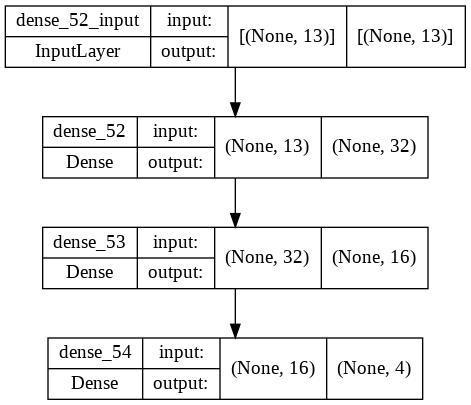

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
dataset_test = pd.read_csv('/content/drive/MyDrive/University_project/test_data.csv')

In [ ]:
dataset_test.head(5)

,Dt(hr),Pwf(psi),Pi(psi),DP(psi),Dp',Qo(bbl/d),Bo(bbl/STB),viscosity oil(cp),porosity,Ct(psi^-1),Co(bbl/psi),h(ft),rw(ft),re(ft),S,k(md),Cs(RB/psi),Doi
0,0.0,3696.59,4000,303.41,-108000.0,90.5,1,1,0.05,0.00001,0.5,10,0.38,351,0,0.01,1000,NaN
1,0.0,3692.05,4000,307.95,-29300.0,90.5,1,1,0.05,0.00001,0.5,10,0.38,351,0,0.01,1000,NaN
2,0.0,3692.05,4000,307.95,-14000.0,90.5,1,1,0.05,0.00001,0.5,10,0.38,351,0,0.01,1000,NaN
3,0.0,3689.77,4000,310.23,-13200.0,90.5,1,1,0.05,0.00001,0.5,10,0.38,351,0,0.01,1000,NaN
4,0.0,3689.77,4000,310.23,-12500.0,90.5,1,1,0.05,0.00001,0.5,10,0.38,351,0,0.01,1000,NaN


In [ ]:
X_test = dataset_test.iloc[:,0:13]
X_test

,Dt(hr),Pwf(psi),Pi(psi),DP(psi),Dp',Qo(bbl/d),Bo(bbl/STB),viscosity oil(cp),porosity,Ct(psi^-1),Co(bbl/psi),h(ft),rw(ft)
0,0.00,3696.59,4000,303.41,-108000.00,90.5,1,1,0.05,0.00001,0.5,10,0.38
1,0.00,3692.05,4000,307.95,-29300.00,90.5,1,1,0.05,0.00001,0.5,10,0.38
2,0.00,3692.05,4000,307.95,-14000.00,90.5,1,1,0.05,0.00001,0.5,10,0.38
3,0.00,3689.77,4000,310.23,-13200.00,90.5,1,1,0.05,0.00001,0.5,10,0.38
4,0.00,3689.77,4000,310.23,-12500.00,90.5,1,1,0.05,0.00001,0.5,10,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,7.90,3498.86,4000,501.14,-2.74,90.5,1,1,0.05,0.00001,0.5,10,0.38
166,8.33,3496.59,4000,503.41,-2.60,90.5,1,1,0.05,0.00001,0.5,10,0.38
167,8.77,3496.59,4000,503.41,-2.47,90.5,1,1,0.05,0.00001,0.5,10,0.38
168,9.25,3494.32,4000,505.68,-2.34,90.5,1,1,0.05,0.00001,0.5,10,0.38


In [ ]:
predictions = model.predict(X_test, batch_size=16,verbose=1)
predictions

11/11 [==============================] - 0s 1ms/step


array([[ 2.20020586e+04,  2.50146484e+01, -2.57736562e+04,
        -9.68648047e+03],
       [ 6.98021436e+03,  6.62988525e+02, -5.48078857e+03,
        -3.22570947e+03],
       [ 4.01354370e+03,  7.94036743e+02, -1.59126233e+03,
        -2.00304858e+03],
       [ 3.75704004e+03,  8.34296997e+02, -1.51545068e+03,
        -1.99162061e+03],
       [ 3.53334229e+03,  8.69724487e+02, -1.44783105e+03,
        -1.98072339e+03],
       [ 3.34075610e+03,  8.99863464e+02, -1.39133289e+03,
        -1.97240442e+03],
       [ 3.14942773e+03,  9.29946716e+02, -1.33300146e+03,
        -1.96243311e+03],
       [ 5.46545947e+03,  7.19220703e+02, -3.45342529e+03,
        -2.57911328e+03],
       [ 5.25347559e+03,  7.26180664e+02, -3.17241040e+03,
        -2.48900098e+03],
       [ 2.62975977e+03,  1.00241162e+03, -1.16118103e+03,
        -1.91419934e+03],
       [ 2.47782812e+03,  1.02401233e+03, -1.10965808e+03,
        -1.89945288e+03],
       [ 2.33457910e+03,  1.04390674e+03, -1.06254700e+03,
      

In [ ]:
np.savetxt("/content/drive/MyDrive/University_project/prediction.csv", predictions, delimiter=",")